<p style="color:blue; font-size:40px; text-align: center;"> Rotten Tomatoes Movie Review</p>

** Data description :Rotten Tomatoes Movie Review **


This dataset contains information about movie title, movie info, critics,tomatometer count,tomatometer status,audience rating.  The dataset comprises the following columns:

-Movie Info:
-**Title:** The title of the movie.

-**Release Date:** The date the movie was released in theaters.

-**Genre:** The genre(s) of the movie (e.g., action, drama, comedy).

-**Runtime:** The total duration of the movie (in minutes).

-**Studio:** The production company or studio behind the movie.

-**Critics Information:**
-**Critics Consensus:** A summary of the general critical

-reception of the film (often a few sentences summarizing the overall opinion).

-**Critic Reviews:** Individual reviews from critics, usually including a brief snippet and a rating (fresh or rotten).

-**Rating Information:**

-**Tomatometer Status:** Indicates whether the movie is "Fresh" (critics generally liked it) or "Rotten" (critics generally did not like it).

-**Tomatometer Count:** The total number of critic reviews counted towards the Tomatometer rating.

-**Tomatometer Rating:** The percentage of critic reviews that are positive (fresh) out of the total reviews counted. This score is calculated by dividing the number of positive reviews by the total number of reviews.

-Audience Rating:

-**Audience Score:** The aggregated percentage of positive user ratings or audience reviews (from users on Rotten Tomatoes). This is typically calculated based on user-submitted reviews, rather than professional critics.
Audience Review Count: The total number of user reviews that contribute to the audience score.

<p style="color:blue; font-size:40px; text-align: center;">Import Library</p>

In [128]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler,LabelEncoder,FunctionTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score,mean_squared_error
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
import warnings
warnings.filterwarnings("ignore")


In [129]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [130]:
data=pd.read_excel("/content/drive/MyDrive/Rotten_Tomatoes_Movies3.xls")

In [131]:
data.shape

(16638, 16)

In [132]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16638 entries, 0 to 16637
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   movie_title         16638 non-null  object        
 1   movie_info          16614 non-null  object        
 2   critics_consensus   8309 non-null   object        
 3   rating              16638 non-null  object        
 4   genre               16621 non-null  object        
 5   directors           16524 non-null  object        
 6   writers             15289 non-null  object        
 7   cast                16354 non-null  object        
 8   in_theaters_date    15823 non-null  datetime64[ns]
 9   on_streaming_date   16636 non-null  datetime64[ns]
 10  runtime_in_minutes  16483 non-null  float64       
 11  studio_name         16222 non-null  object        
 12  tomatometer_status  16638 non-null  object        
 13  tomatometer_rating  16638 non-null  int64     

In [133]:
data.head(5)

,movie_title,movie_info,critics_consensus,rating,genre,directors,writers,cast,in_theaters_date,on_streaming_date,runtime_in_minutes,studio_name,tomatometer_status,tomatometer_rating,tomatometer_count,audience_rating
0,Percy Jackson & the Olympians: The Lightning T...,A teenager discovers he's the descendant of a ...,Though it may seem like just another Harry Pot...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,Craig Titley,"Logan Lerman, Brandon T. Jackson, Alexandra Da...",2010-02-12,2010-06-29,83.0,20th Century Fox,Rotten,49,144,53.0
1,Please Give,Kate has a lot on her mind. There's the ethics...,Nicole Holofcener's newest might seem slight i...,R,Comedy,Nicole Holofcener,Nicole Holofcener,"Catherine Keener, Amanda Peet, Oliver Platt, R...",2010-04-30,2010-10-19,90.0,Sony Pictures Classics,Certified Fresh,86,140,64.0
2,10,Blake Edwards' 10 stars Dudley Moore as George...,NaN,R,"Comedy, Romance",Blake Edwards,Blake Edwards,"Dudley Moore, Bo Derek, Julie Andrews, Robert ...",1979-10-05,1997-08-27,118.0,Waner Bros.,Fresh,68,22,53.0
3,12 Angry Men (Twelve Angry Men),"A Puerto Rican youth is on trial for murder, a...",Sidney Lumet's feature debut is a superbly wri...,NR,"Classics, Drama",Sidney Lumet,Reginald Rose,"Martin Balsam, John Fiedler, Lee J. Cobb, E.G....",1957-04-13,2001-03-06,95.0,Criterion Collection,Certified Fresh,100,51,97.0
4,"20,000 Leagues Under The Sea","This 1954 Disney version of Jules Verne's 20,0...","One of Disney's finest live-action adventures,...",G,"Action & Adventure, Drama, Kids & Family",Richard Fleischer,Earl Felton,"James Mason, Kirk Douglas, Paul Lukas, Peter L...",1954-01-01,2003-05-20,127.0,Disney,Fresh,89,27,74.0


In [134]:
data.dtypes

,0
movie_title,object
movie_info,object
critics_consensus,object
rating,object
genre,object
directors,object
writers,object
cast,object
in_theaters_date,datetime64[ns]
on_streaming_date,datetime64[ns]


In [135]:
data.isnull().sum()

,0
movie_title,0
movie_info,24
critics_consensus,8329
rating,0
genre,17
directors,114
writers,1349
cast,284
in_theaters_date,815
on_streaming_date,2


In [136]:
data.describe(include="object").transpose()

,count,unique,top,freq
movie_title,16638,16106,Home,5
movie_info,16614,16613,An adaptation of the Broadway drama about Prin...,2
critics_consensus,8309,8307,"Extinction has a few intriguing ideas, but the...",2
rating,16638,8,R,6136
genre,16621,1080,Drama,1727
directors,16524,8314,Alfred Hitchcock,36
writers,15289,12121,Woody Allen,33
cast,16354,16326,Chris Rock,4
studio_name,16222,2886,Paramount Pictures,497
tomatometer_status,16638,3,Rotten,7233


In [137]:
data['tomatometer_status'].unique()

array(['Rotten', 'Certified Fresh', 'Fresh'], dtype=object)

<p style="color:blue; font-size:40px; text-align: center;"> Data Analysis and Visualization</p>

Text(0.5, 1.0, 'Tomatometer audience rating')

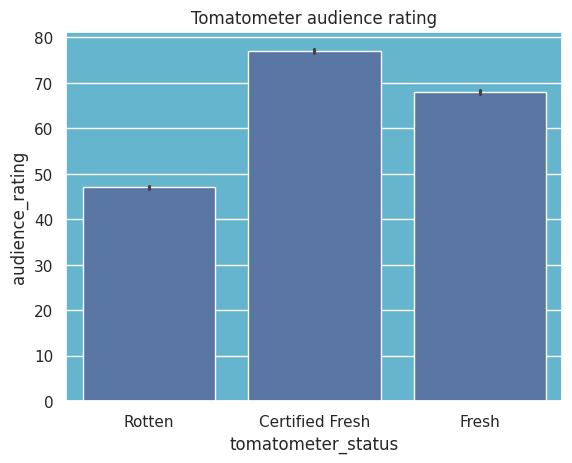

In [138]:
sns.set(rc={'axes.facecolor':'c','axes.grid':'True'})
sns.barplot(x=data['tomatometer_status'],y=data['audience_rating'])
plt.title("Tomatometer audience rating")

In [139]:

data['rating'].unique()

array(['PG', 'R', 'NR', 'G', 'PG-13', 'PG-13)', 'NC17', 'R)'],
      dtype=object)

<Axes: xlabel='rating', ylabel='audience_rating'>

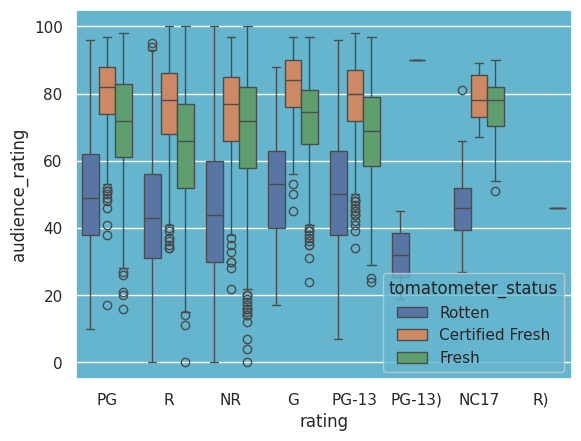

In [140]:
sns.boxplot(x=data['rating'],y=data['audience_rating'],hue=data['tomatometer_status'])

Text(0.5, 1.0, 'Run time in tomatometer status')

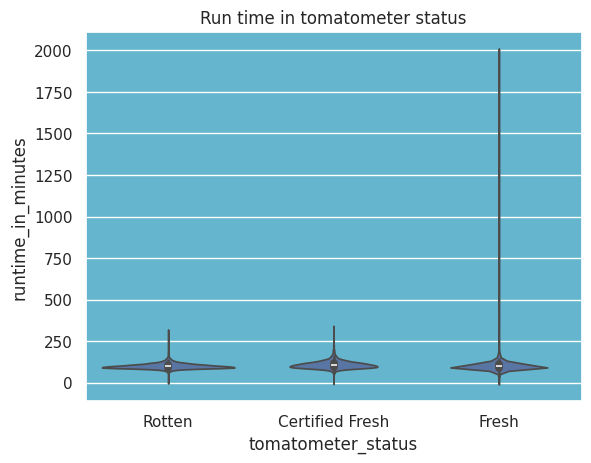

In [141]:

sns.set(rc={'axes.facecolor':'c','axes.grid':'True'})
sns.violinplot(y=data['runtime_in_minutes'],x=data['tomatometer_status'])
plt.title("Run time in tomatometer status")

In [142]:

data['runtime_in_minutes'].nunique()

201

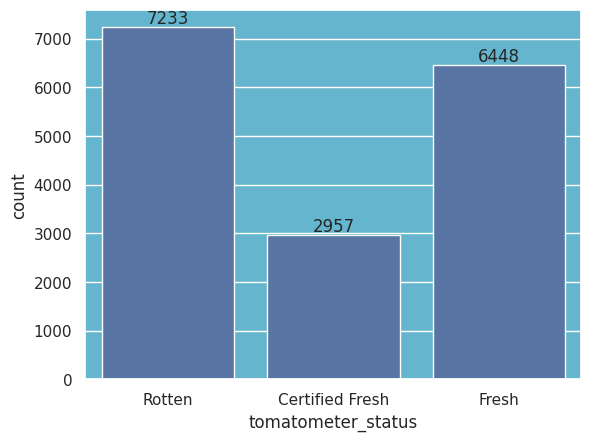

In [143]:
count=sns.countplot(x=data['tomatometer_status'])
for container in count.containers:
    count.bar_label(container)

In [144]:
import matplotlib as mpl

In [145]:
mpl.RcParams.update(mpl.rcParamsDefault)

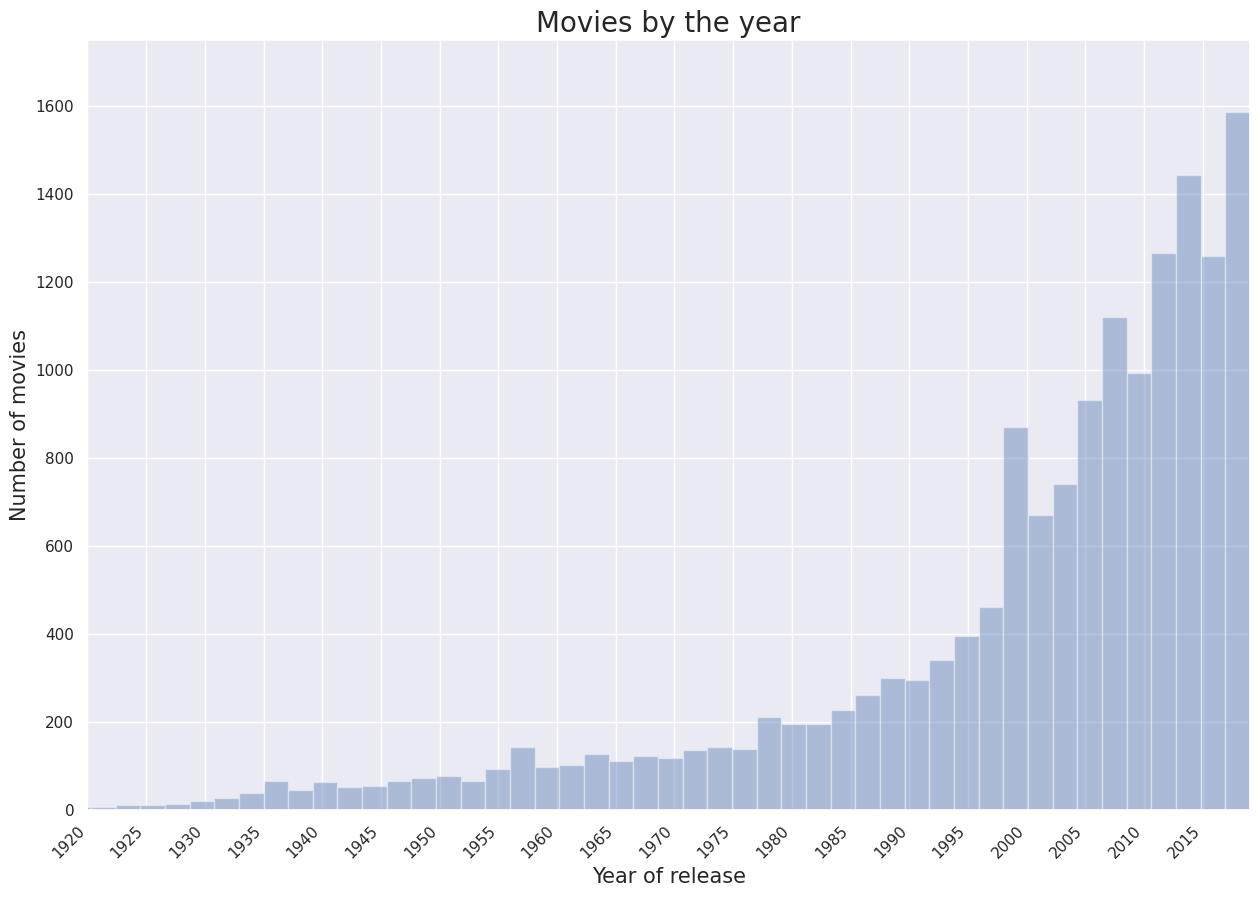

In [146]:
data = data[data.in_theaters_date.notnull()]
data['in_theaters_date'] = pd.to_datetime(data['in_theaters_date'])
data['movie_year'] = data['in_theaters_date'].apply(lambda x: x.year)

sns.set(style="darkgrid")

plt.figure(figsize=(15,10))
plt.title('Movies by the year', size=20)
sns.distplot(data.movie_year, kde=False)
plt.ylabel('Number of movies', size=15)
plt.xlabel('Year of release',size=15)
plt.axis([1920, 2019, 0, 1750])
plt.xticks(np.arange(1920, 2018, step=5),rotation=45, ha='right')
plt.show()

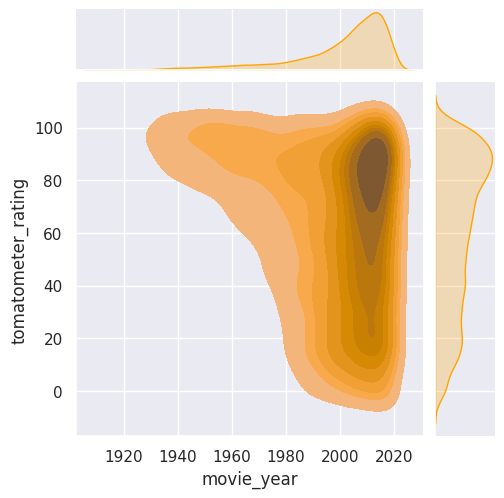

In [147]:
data = data[(data.tomatometer_rating.notnull()) &
                      (data.audience_rating.notnull())]
sns.jointplot(x=data['movie_year'], y=data['tomatometer_rating'],fill=True,color='orange',
              kind="kde").fig.set_size_inches(5,5)

plt.show()

In [148]:
data['tomatometer_status'].value_counts().reset_index()

,tomatometer_status,count
0,Rotten,6891
1,Fresh,5850
2,Certified Fresh,2926


Text(0.5, 1.0, 'Test Case')

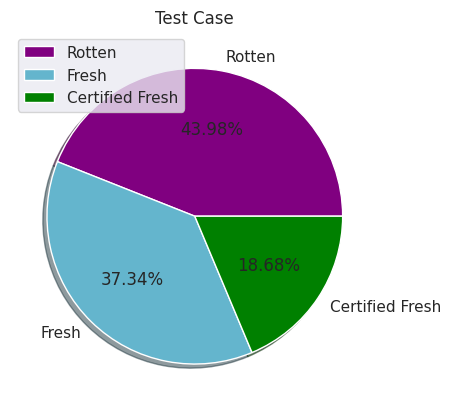

In [149]:


pipe=data['tomatometer_status'].value_counts()
plt.pie(pipe,autopct='%0.2f%%',shadow=True,colors=['purple','c','green'],
        labels=['Rotten','Fresh','Certified Fresh'])
plt.legend(loc="upper left")
plt.title("Test Case")

In [150]:
data['genre'].nunique()

1047

<function matplotlib.pyplot.tight_layout(*, pad: 'float' = 1.08, h_pad: 'float | None' = None, w_pad: 'float | None' = None, rect: 'tuple[float, float, float, float] | None' = None) -> 'None'>

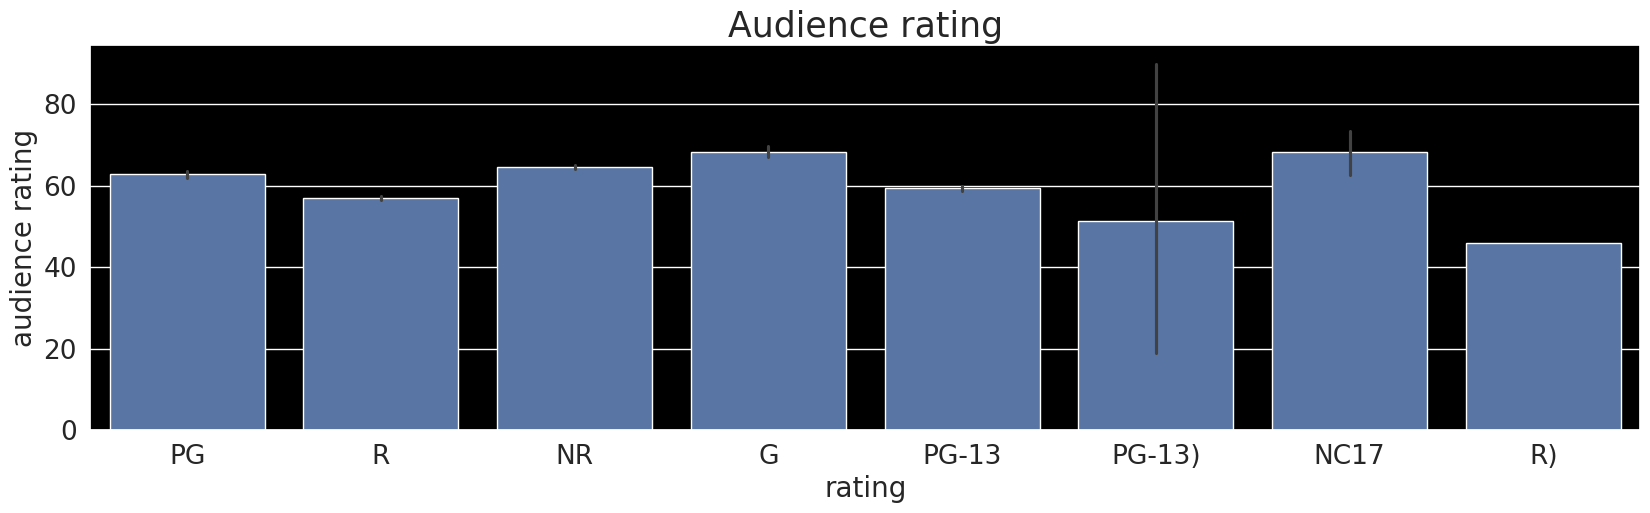

In [151]:
sns.set(rc={'axes.facecolor':'black','axes.grid':'True'})
plt.figure(figsize=(20,5))
sns.barplot(x=data['rating'],y=data['audience_rating'])
plt.xticks(fontsize=19)
plt.yticks(fontsize=19)
plt.xlabel("rating",fontsize=20)
plt.ylabel("audience rating",fontsize=20)
plt.title('Audience rating',fontsize=25)
plt.tight_layout

In [152]:
data.dtypes

,0
movie_title,object
movie_info,object
critics_consensus,object
rating,object
genre,object
directors,object
writers,object
cast,object
in_theaters_date,datetime64[ns]
on_streaming_date,datetime64[ns]


In [153]:
data['tomatometer_rating'].nunique()

101

In [154]:
mpl.RcParams.update(mpl.rcParamsDefault)

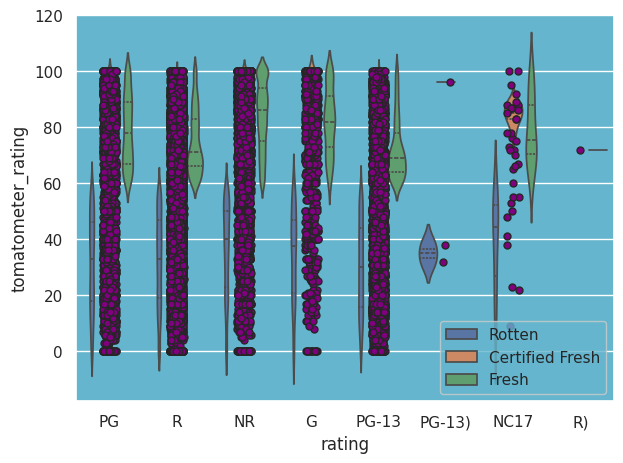

In [155]:
sns.set(rc={"axes.facecolor":'c','axes.grid':"True"})
sns.violinplot(y=data['tomatometer_rating'],x=data['rating'],hue=data['tomatometer_status'],
              inner='quartile')
sns.stripplot(y=data['tomatometer_rating'],x=data['rating'], color='purple',linewidth=1)

plt.tight_layout()

In [156]:
data.dropna(inplace=True)

In [157]:
data.shape

(7610, 17)

<p style="color:blue; font-size:40px; text-align: center;">Handling Outlier</p>

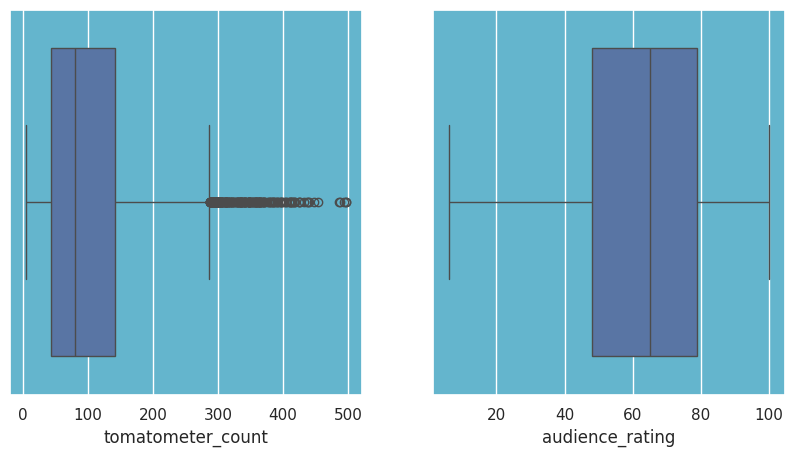

In [158]:
#Columns with high correlation
#Checking for OUTLIERS



box_col = ['tomatometer_count', 'audience_rating']
fig, ax = plt.subplots(1, 2, figsize=(10,5))
ax = ax.flatten()
for index, value in enumerate(box_col):
    sns.boxplot(data=data, x=value, ax=ax[index])

In [159]:



# outlier handle
q1=data['tomatometer_rating'].quantile(0.25)
q3=data['tomatometer_rating'].quantile(0.75)
IQR=q3-q1
ll=q1-1.5*IQR
ul=q3+1.5*IQR

print(ll,ul)
new_df=data.copy()
new_df.loc[(new_df['tomatometer_rating']<ll), 'tomatometer_rating']=ll
#new_df.loc[(new_df['audience_rating']<ll), new_df['']]=ll
new_df.loc[(new_df['tomatometer_rating']>=ul), 'tomatometer_rating']=ul

-31.5 156.5


<Axes: ylabel='tomatometer_rating'>

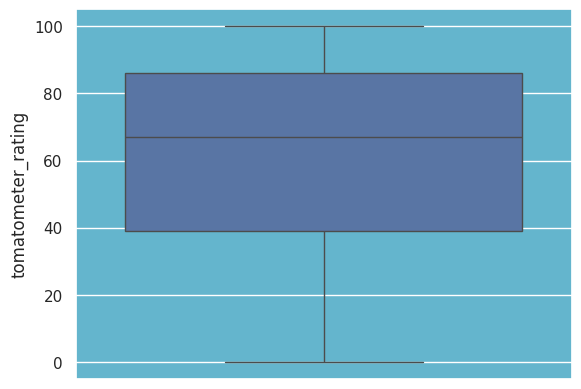

In [160]:
sns.boxplot(data['tomatometer_rating'])

In [161]:
data.columns

Index(['movie_title', 'movie_info', 'critics_consensus', 'rating', 'genre',
       'directors', 'writers', 'cast', 'in_theaters_date', 'on_streaming_date',
       'runtime_in_minutes', 'studio_name', 'tomatometer_status',
       'tomatometer_rating', 'tomatometer_count', 'audience_rating',
       'movie_year'],
      dtype='object')

In [162]:
for i in ['movie_title','directors', 'writers','cast', 'in_theaters_date', 'on_streaming_date',
         'studio_name','movie_year']:
    data.drop(i,inplace=True,axis=1)

In [163]:
data.columns

Index(['movie_info', 'critics_consensus', 'rating', 'genre',
       'runtime_in_minutes', 'tomatometer_status', 'tomatometer_rating',
       'tomatometer_count', 'audience_rating'],
      dtype='object')

In [164]:
data.dtypes

,0
movie_info,object
critics_consensus,object
rating,object
genre,object
runtime_in_minutes,float64
tomatometer_status,object
tomatometer_rating,int64
tomatometer_count,int64
audience_rating,float64


In [165]:
data['rating'].unique()

array(['PG', 'R', 'NR', 'G', 'PG-13', 'PG-13)', 'NC17', 'R)'],
      dtype=object)

In [166]:
data['rating']=data['rating'].map({'PG':0,'R':1,'NR':2,'G':3,'PG-13':4,'PG-13)':5,'NC17':6,'R)':7})

In [167]:
data['rating'].unique()

array([0, 1, 2, 3, 4, 5, 6, 7])

In [168]:
data.isnull().sum()

,0
movie_info,0
critics_consensus,0
rating,0
genre,0
runtime_in_minutes,0
tomatometer_status,0
tomatometer_rating,0
tomatometer_count,0
audience_rating,0


In [169]:
data.dtypes

,0
movie_info,object
critics_consensus,object
rating,int64
genre,object
runtime_in_minutes,float64
tomatometer_status,object
tomatometer_rating,int64
tomatometer_count,int64
audience_rating,float64


In [170]:
data['genre'].nunique()

624

In [171]:
le=LabelEncoder()
data['genre']=le.fit_transform(data['genre'])

In [172]:
data['genre'].nunique()

624

In [173]:
data.head(3)

,movie_info,critics_consensus,rating,genre,runtime_in_minutes,tomatometer_status,tomatometer_rating,tomatometer_count,audience_rating
0,A teenager discovers he's the descendant of a ...,Though it may seem like just another Harry Pot...,0,112,83.0,Rotten,49,144,53.0
1,Kate has a lot on her mind. There's the ethics...,Nicole Holofcener's newest might seem slight i...,1,414,90.0,Certified Fresh,86,140,64.0
3,"A Puerto Rican youth is on trial for murder, a...",Sidney Lumet's feature debut is a superbly wri...,2,376,95.0,Certified Fresh,100,51,97.0


In [174]:
data.dtypes

,0
movie_info,object
critics_consensus,object
rating,int64
genre,int64
runtime_in_minutes,float64
tomatometer_status,object
tomatometer_rating,int64
tomatometer_count,int64
audience_rating,float64


<p style="color:blue; font-size:40px; text-align: center;">EDA</p>

In [175]:
data['tomatometer_status'].unique()

array(['Rotten', 'Certified Fresh', 'Fresh'], dtype=object)

In [176]:
data['tomatometer_status']=data['tomatometer_status'].replace({'Rotten':0, 'Certified Fresh':1,
                                                               'Fresh':2})

In [177]:
data.dtypes

,0
movie_info,object
critics_consensus,object
rating,int64
genre,int64
runtime_in_minutes,float64
tomatometer_status,int64
tomatometer_rating,int64
tomatometer_count,int64
audience_rating,float64


In [178]:
cat_data=[x for x in data.columns if data[x].dtypes=='O']
con_data=[x for x in data.columns if data[x].dtypes!='O']

In [179]:
cat=data[cat_data]
con=data[con_data]

In [180]:
cat.head(4)

,movie_info,critics_consensus
0,A teenager discovers he's the descendant of a ...,Though it may seem like just another Harry Pot...
1,Kate has a lot on her mind. There's the ethics...,Nicole Holofcener's newest might seem slight i...
3,"A Puerto Rican youth is on trial for murder, a...",Sidney Lumet's feature debut is a superbly wri...
4,"This 1954 Disney version of Jules Verne's 20,0...","One of Disney's finest live-action adventures,..."


In [181]:
con.head(3)

,rating,genre,runtime_in_minutes,tomatometer_status,tomatometer_rating,tomatometer_count,audience_rating
0,0,112,83.0,0,49,144,53.0
1,1,414,90.0,1,86,140,64.0
3,2,376,95.0,1,100,51,97.0


In [182]:
con.rename(columns={'rating':0, 'genre':1,'runtime_in_minutes':2, 'tomatometer_status':3, 'tomatometer_rating':4,'tomatometer_count':5,},inplace=True)

In [183]:
con.isnull().sum()

,0
0,0
1,0
2,0
3,0
4,0
5,0
audience_rating,0


In [184]:
cat.isnull().sum()

,0
movie_info,0
critics_consensus,0


In [185]:
cat['critics_consensus'].iloc[4]

'With attention strictly paid to style instead of substance, or historical accuracy, 10,000 B.C. is a visually impressive but narratively flimsy epic.'

In [186]:
cat['movie_info'].iloc[5]

'A man in London tries to help a counterespionage agent. But when the agent is killed and he stands accused, he must go on the run to both save himself and also stop a spy ring trying to steal top secret information.'

In [187]:
cat['critics_consensus'].iloc[100]

'With a workplace-related theme worthy of satire, The Promotion features some sharp witticisms but ultimately disappoints.'

In [188]:
cat['critics_consensus'].iloc[100]

'With a workplace-related theme worthy of satire, The Promotion features some sharp witticisms but ultimately disappoints.'

In [189]:
import nltk
nltk.download('stopwords')
a=stopwords.words('english')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [190]:
ps=PorterStemmer()

<p style="color:blue; font-size:40px; text-align: center;">Create Pipeline</p>

In [191]:
def clean_html(x):
    clean = re.compile(r'<.*?>')  # Regex to remove all HTML tags
    return [re.sub(clean, '', text) for text in x]

# Function to convert text to lowercase
def to_lowercase(x):
    return [text.lower() for text in x]

# Function to remove special characters (non-alphanumeric)
def remove_special_characters(x):
    return [re.sub(r'[^a-zA-Z0-9\s]', '', text) for text in x]

# Function to remove stopwords
def remove_stopwords(x):
    stop_words = stopwords.words('english')
    return [' '.join([word for word in text.split() if word not in stop_words]) for text in x]

In [192]:
html_removal = FunctionTransformer(clean_html, validate=False)
lowercase = FunctionTransformer(to_lowercase, validate=False)
special_char_removal = FunctionTransformer(remove_special_characters, validate=False)
stopwords_removal = FunctionTransformer(remove_stopwords, validate=False)

In [193]:
text_pipeline = Pipeline([
    ('html_removal', html_removal),
    ('lowercase', lowercase),
    ('special_char_removal', special_char_removal),
    ('stopwords_removal', stopwords_removal),
])

In [194]:
processed_data = text_pipeline.fit_transform(cat['critics_consensus'])

In [195]:
processed=text_pipeline.fit_transform(cat['movie_info'])

In [196]:
movie=pd.DataFrame(processed)

In [218]:
movie.rename(columns={0:'critics_consensus'},inplace=True)

In [219]:
movie['critics_consensus'].iloc[0]

'teenager discovers hes descendant greek god sets adventure settle ongoing battle gods'

In [220]:
critics=pd.DataFrame(processed_data)

In [221]:
critics.rename(columns={0:'movie_info'},inplace=True)

In [222]:
review=pd.concat([movie,critics],axis=1)

In [223]:
review.head(3)

,critics_consensus,movie_info
0,teenager discovers hes descendant greek god se...,though may seem like another harry potter knoc...
1,kate lot mind theres ethics problem buying fur...,nicole holofceners newest might seem slight pl...
2,puerto rican youth trial murder accused knifin...,sidney lumets feature debut superbly written d...


In [224]:

review.shape

(7610, 2)

In [225]:
con.isnull().sum()

,0
0,0
1,0
2,0
3,0
4,0
5,0
audience_rating,0


In [226]:
con.shape

(7610, 7)

<p style="color:blue; font-size:40px; text-align: center;">Apply Vectorizer</p>

In [213]:
from sklearn.feature_extraction.text import CountVectorizer

In [214]:
cv=CountVectorizer()

In [227]:
review.columns

Index(['critics_consensus', 'movie_info'], dtype='object')

In [228]:
cri=cv.fit_transform(review['movie_info']).toarray()

In [230]:
movie=cv.fit_transform(review['critics_consensus']).toarray()

In [231]:
pd.DataFrame(cri)

,0,1,2,3,4,5,6,7,8,9,...,16870,16871,16872,16873,16874,16875,16876,16877,16878,16879
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7605,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7606,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
7607,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
7608,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [232]:
pd.DataFrame(movie)

,0,1,2,3,4,5,6,7,8,9,...,54001,54002,54003,54004,54005,54006,54007,54008,54009,54010
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7605,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7606,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7607,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7608,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [234]:
data=pd.concat([con,pd.DataFrame(cri),pd.DataFrame(movie)],axis=1)

In [235]:
data.shape

(11763, 70898)

In [236]:
df=data.sample(1000)

In [ ]:
df.dropna(inplace=True)

In [239]:
X=df.drop('audience_rating',axis=1)

In [240]:
y=df['audience_rating']

<p style="color:blue; font-size:40px; text-align: center;">Model Selection</p>

In [244]:
from sklearn.model_selection import train_test_split

In [245]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [249]:
def algorithms(ml_model):
  model=ml_model.fit(X_train,y_train)
  print('Training Score',model.score(X_train,y_train))
  y_pred=model.predict(X_test)
  r2=r2_score(y_test,y_pred=y_pred)
  print('r2_score',r2)
  mse=mean_squared_error(y_test,y_pred)
  print('mse',mse)
  sns.displot(y_test-y_pred)
  plt.show()
  print(ml_model)
  return y_pred

Training Score 0.9412612141125355
r2_score 0.612280698719343
mse 144.94371756855253


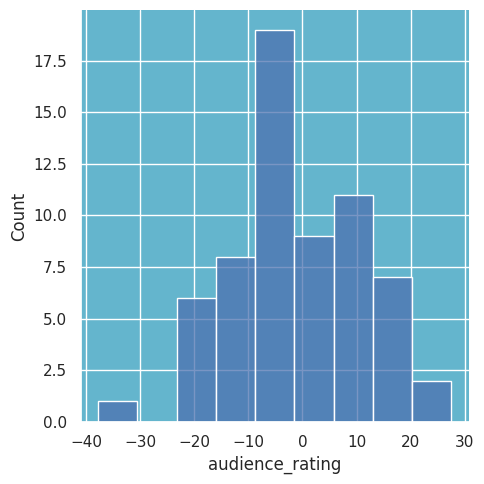

GradientBoostingRegressor()


array([53.03037606, 76.17514619, 54.6476875 , 47.95720275, 77.73003686,
       75.0142922 , 77.67676302, 39.70158007, 47.70855535, 82.92553108,
       77.57174643, 51.18378357, 60.21098191, 53.44066958, 67.31553916,
       49.20034836, 71.25931361, 50.82675083, 75.82592525, 86.28597773,
       50.45002622, 85.92632885, 53.03037606, 80.21439288, 77.48904914,
       39.17725575, 52.91013345, 83.37928525, 67.65869913, 49.60688248,
       54.09566126, 71.67387359, 45.04951373, 51.50713717, 43.67041275,
       63.8452946 , 69.75085047, 67.89127516, 79.98266232, 45.91820273,
       80.1576624 , 62.78959149, 51.21357788, 44.64506997, 79.97269754,
       52.14820711, 57.06499194, 45.56677894, 55.34395679, 92.40225278,
       75.85302824, 80.30613873, 57.99126505, 46.70250037, 61.42873695,
       84.37519861, 82.87512546, 67.1277831 , 82.4114904 , 43.78937994,
       76.86500497, 78.18608931, 49.15164738])

In [250]:
algorithms(GradientBoostingRegressor())